# Diferenciación automática: Parte 2

### NOTA

Este notebook se iniciará en la clase y **debe** hacerse en equipo, con los *mismos miembros* que participaron en la "Tarea4.ipynb". La resolución completa de los ejercicios debe ser enviada como "Tarea5.ipynb".

## Funciones elementales

Lo que se logró en la clase pasada fue, esencialmente, tener una manera de obtener primeras
derivadas para cualquier función racional, esto es, cocientes de polinomios en una variable.

El siguiente paso es incluir más funciones a fin de ampliar la aplicabilidad de lo hecho la vez pasada, en particular a las funciones elementales: $\exp$, $\log$, etc.

La extensión a estas funciones es elemental, y así por ejemplo tenemos:

\begin{eqnarray}
\exp[\vec{f}(x_0)] &=& \big( \exp(f_0),\, f'_0\exp(f_0) \,\big),\\
\log[\vec{f}(x_0)] &=& \big( \log(f_0),\, \frac{f'_0}{f_0} \,\big),\\
\sin[\vec{f}(x_0)] &=& \big( \sin(f_0),\, f'_0\cos(f_0) \,\big),\\
\cos[\vec{f}(x_0)] &=& \big( \cos(f_0),\, -f'_0\sin(f_0) \,\big),\\
\tan[\vec{f}(x_0)] &=& \big( \tan(f_0),\, f'_0\sec^2(f_0) \,\big),\\
\sinh[\vec{f}(x_0)] &=& \big( \sinh(f_0),\, f'_0\cosh(f_0) \,\big),\\
...\\
\end{eqnarray}

Vale la pena enfatizar que la regla de la cadena se utiliza en la segunda componente del 
lado derecho de estas ecuaciones.

## Ejercicio

Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.org/en/release-0.4/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea5.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Aprovechen las capacidades de Julia en metaprogramming.

In [1]:
include("AutomDiff.jl")
using AD

In [ ]:
derivadas = (
[:exp,:(exp(x.fun))],
[:sqrt,:(1/(2*sqrt(x.fun)))],
[:log,:(1/x.fun)],
[:sin,:(cos(x.fun))],
[:cos,:(-sin(x.fun))],
[:tan,:(sec(x.fun)^2)],
[:cot,:(-csc(x.fun)^2)],
[:sec,:(sec(x.fun)*tan(x.fun))],
[:csc,:(-csc(x.fun)*cot(x.fun))],
[:sinh,:(cosh(x.fun))],
[:cosh,:(sinh(x.fun))],
[:tanh,:(sec(x.fun)^2)],
[:coth,:(-csch(x.fun)^2)],
[:sech,:(sech(x.fun)*tanh(x.fun))],
[:csch,:(-csch(x.fun)*coth(x.fun))],
[:asin,:(1/sqrt(1-(x.fun^2)))],
[:acos,:(-1/sqrt(1-(x.fun^2)))],
[:atan,:(1/sqrt(1+(x.fun^2)))],
[:acot,:(-1/(1+(x.fun^2)))],
[:asec,:(1/(abs(x.fun)*sqrt((x.fun^2)-1)))],
[:acsc,:(-1/(abs(x.fun)*sqrt((x.fun^2)-1)))],
[:asinh,:(1/sqrt((x.fun^2)+1))],
[:acosh,:(1/sqrt((x.fun^2)-1))],
[:atanh,:(1/sqrt(1-(x.fun^2)))],
[:acoth,:(1/sqrt(1-(x.fun^2)))],
[:asech,:(1/(1-(x.fun^2)))],
[:acsch,:(-1/(abs(x.fun)*sqrt((x.fun^2)+1)))],
[:sinc,:(cosc(x.fun))],
)

In [ ]:
for op in derivadas
  eval(quote
        import Base:$(op[1])
        ($(op[1]))(x::Dual) = Dual( $(op[1])(x.fun) , x.der*$(op[2]) ) 
  end)
end

In [7]:
#test
# vamos a probar por ejemplo sin(Dual(a,b))==Dual(sin(a),b*cos(a)), ya tenemos una lista de
# derivadas definida, asi que podemos hacerlo automaticamente, y vamos a probar para diferentest
# tipos de numeros.
using Base.Test
A=(1,7,0.0,1.0,7.0,pi,-1,-7)
for (a in A)
    for(b in A)
        x=Dual(a,b)
        for op in derivadas
            da=false;
            db=false;
            try # el try es para descartar diviciones entre 0 y sqrt de numeros negativos
                da=eval(quote$(op[1])end)(x)
            end
            try
                db=Dual(eval(quote$(op[1])end)(a) , b*(eval(quote$(op[2])end)))
            end
            if(da!=false && db!=false && !isnan(db.fun) && !isnan(db.der))
                print ("tested: ",op[1],"(",x,") = ",da,"\n",)
                @test da==db
            end
            
        end
    end
end

## Ejercicio

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [2]:
f(x)=sin(x^3-(2/(x^6)))
f(xdual(2))

0.9934213368955197 + -1.384934905523464ε

In [8]:
f(x)=sin(x^3-(2/(x^6)))
A = linspace(1,5,1000)
B=Float64[]

for a in A
    push!(B,f(xdual(a)).der)
end
#Talvez seria util implementar Duales con Arrays

In [ ]:
Pkg.add("UnicodePlots")
Pkg.add("PyPlot")

In [9]:
using UnicodePlots
myPlot = lineplot(A,B, title="My Plot", border=:dotted)

                        My Plot
       ⡤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⢤ 
    80 ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⡄⢸ 
       ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⣠⣶⣇⡇⣇⢸ 
       ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡀⡆⡇⣿⣿⣿⣿⡇⣿⢸ 
       ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⢠⠀⣆⢸⢸⡇⡇⣷⣿⣿⣿⣿⡇⣿⢸ 
       ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠀⣶⠀⣇⢸⡇⣿⢸⢸⡇⡇⣿⣿⣿⣿⣿⣿⣿⢸ 
       ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⣤⠀⢀⢧⠀⣿⠀⣿⠀⣿⢸⡇⣿⢸⣸⡇⡇⣿⣿⣿⣿⣿⣿⣿⢸ 
       ⡇⠶⣄⠀⠀⠀⠀⠀⢠⠤⡄⠀⠀⣸⢹⠀⠀⡏⡇⢸⢸⠀⡿⡀⣿⢸⢸⢸⡇⣿⡇⣿⣷⢱⣿⣿⣿⣿⣿⣿⣿⢸ 
       ⡇⠤⠬⠷⣤⠤⠤⡴⠧⠤⠼⡤⠤⡧⠤⡧⢼⠤⡧⢼⢼⢤⠧⡧⡿⣼⢼⢼⡧⣿⡧⣿⣿⢼⣿⣿⣿⣿⣿⣿⣿⢸ 
       ⡇⠀⠀⠀⠈⠉⠉⠁⠀⠀⠀⠳⡼⠀⠀⢳⡼⠀⢳⡎⠈⣾⠀⣷⠁⣿⢸⡇⣿⢸⡇⣿⣿⢸⣿⣿⣿⣿⣿⣿⣿⢸ 
       ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠃⠀⠸⠇⠀⣿⠀⣿⠀⣿⢸⡇⣿⢸⡇⣿⣿⢸⣿⣿⣿⣿⣿⣿⢿⢸ 
       ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠛⠀⣿⠸⡇⢻⢸⡇⣿⣿⢸⢻⣿⣿⣿⣿⣿⢸⢸ 
       ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠘⠘⡇⡿⢸⢸⢸⣿⣿⣿⣿⣿⢸⢸ 
       ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠘⠸⢸⢻⣿⣿⣿⢿⢸⢸ 
       ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠻⢻⢸⢸⢸ 
   -80 ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠘⢸ 
       ⠓⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠚ 
       1                                        5


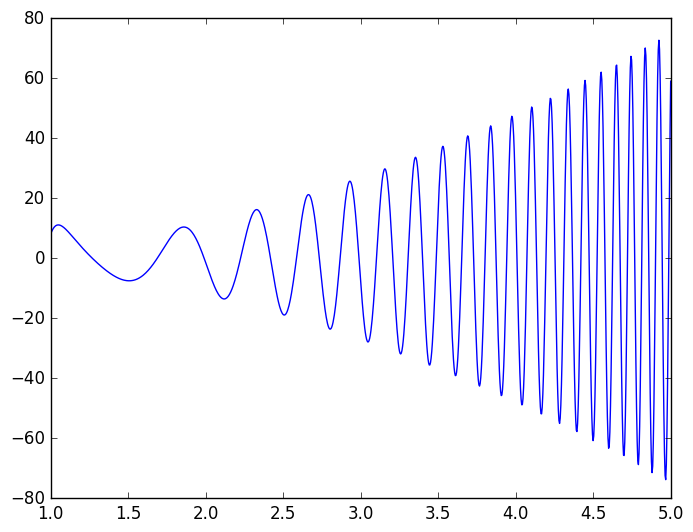

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000017DE5F28>

In [10]:
using PyPlot
plot(A,B)

# Ejercicio

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [ ]:
function newton(f,x0=0,n=10)
    xn=x0
    for i = 1:n
        d=f(xdual(xn))
        xn-=d.fun/d.der
    end
    xn
end

In [13]:
f(x)=(x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)
g(x)=x*sin(2x)
print("f(2.2)\t-> ",newton(f,2.2))
print("\nf(2.45)\t-> ",newton(f,2.45))
print("\ng(0.7)\t-> ",newton(g,0.7))

f(2.2)	-> 2.0
f(2.45)	-> 6.0
g(0.7)	-> 0.0002615203939528769

# Pregunta

¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.

**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea; la idea es empezar a pensar en esto.

Talvez se podria usar el mismo metodo muchas veces? aunque eso introduciria un error cada vez mas y mas grande, o podriamos hacer une version de los duales pero de segunda derivada, y luego de tercera, etc. ? o talvez se pueda hacer algo asi pero automaticamente